# Analyse von Ladestationen

#### Dieses Projekt untersucht Daten zu Ladestationen für Elektrofahrzeuge mit dem Fokus auf Energieverbrauch (kWh) und Nutzungsdauer (Stunden). Die Analyse umfasst historische Daten, die nach Jahr und Standort (ChargePointLabel) gruppiert sind.

#### Im ersten Teil wird eine explorative Datenanalyse durchgeführt. Ziel ist es, einen Überblick über die Datenqualität zu erhalten und potenzielle Joins zu identifizieren.Im zweiten Teil erfolgt die Erstellung der aggregierten Zieltabelle.

### 1. Datenexploration

In [3]:
# bibliotheken importieren
import pandas as pd
import os
from scripts.data_fetcher import fetch_data
import numpy as np

In [4]:
# Daten laden
cs_file = fetch_data("downloadCS")
cdrs_file = fetch_data("downloadCDRs")

In [5]:
# Dateien einlesen
cs_data = pd.read_excel(cs_file)
cdrs_data = pd.read_excel(cdrs_file)

In [6]:
# Kopie der Tabellen erstellen
cs_data_copy = cs_data.copy()
cdrs_data_copy = cdrs_data.copy()

In [7]:
# Alle Spalten ausgeben
pd.set_option('display.max_columns', None)

# Dateninspektion 
print("CS Daten Übersicht:")
print(cs_data_copy.info())
display(cs_data_copy)

print("\nCDRS Daten Übersicht:")
print(cdrs_data_copy.info())
display(cdrs_data_copy)

CS Daten Übersicht:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Key                  6 non-null      object        
 1   Name                 6 non-null      object        
 2   Status               6 non-null      object        
 3   Hersteller           6 non-null      object        
 4   Modell               6 non-null      object        
 5   Serialnumber         6 non-null      object        
 6   Inbetriebnahmedatum  6 non-null      datetime64[ns]
 7   Zugang               6 non-null      object        
 8   Öffnungszeiten       6 non-null      object        
dtypes: datetime64[ns](1), object(8)
memory usage: 564.0+ bytes
None


,Key,Name,Status,Hersteller,Modell,Serialnumber,Inbetriebnahmedatum,Zugang,Öffnungszeiten
0,LAD-1415,McD_0357,in Betrieb,Alpitronic,HYC_TRI,HYC_150_19BZ00547,2019-11-11,Öffentlich,24/7
1,LAD-1544,McD_0680,in Betrieb,Alpitronic,HYC_DOU,HYC_150_20BZ0360A,2020-08-04,Öffentlich,24/7
2,LAD-1289,McD_1578,in Betrieb,Alpitronic,HYC_TRI,HYC_150_19BZ00748,2020-03-19,Öffentlich,24/7
3,LAD-1264,McD_1583,in Betrieb,Alpitronic,HYC_DOU,HYC_150_19BZ00760,2020-05-19,Öffentlich,24/7
4,LAD-1555,McD_1591,in Betrieb,Alpitronic,HYC_DOU,HYC_150_20BZ0362A,2020-10-01,Öffentlich,24/7
5,LAD-1555,McD_1801,in Betrieb,Alpitronic,HYC_DOU,HYC_150_21BZ4534X,2021-02-01,Öffentlich,24/7



CDRS Daten Übersicht:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7329 entries, 0 to 7328
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Start                    7329 non-null   datetime64[ns]
 1   End                      7329 non-null   datetime64[ns]
 2   ChargePointLabel         7329 non-null   object        
 3   InvoiceDate              285 non-null    datetime64[ns]
 4   MeterStart               7329 non-null   int64         
 5   MeterEnd                 7324 non-null   float64       
 6   MeterTotal               7324 non-null   float64       
 7   MeteringSignature        0 non-null      float64       
 8   DurationTotal            7329 non-null   int64         
 9   EVSEId                   7315 non-null   object        
 10  RoamingPartnerName       4993 non-null   object        
 11  RoamingPartnerSlug       4983 non-null   object        
 12  ChargePoint

,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
0,2020-03-11 06:35:29,2020-03-11 07:11:28,McD_0357,NaT,6933781,6948422.0,14641.0,NaN,2159,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
1,2019-11-17 12:21:43,2019-11-17 13:15:06,McD_0357,NaT,86713,110950.0,24237.0,NaN,3203,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2,2020-02-11 06:37:35,2020-02-11 06:57:09,McD_0357,NaT,4371963,4383472.0,11509.0,NaN,1174,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
3,2019-11-27 16:58:22,2019-11-27 17:10:24,McD_0357,NaT,438666,445898.0,7232.0,NaN,722,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
4,2020-03-03 11:36:04,2020-03-03 12:00:23,McD_0357,2020-04-01 13:36:28,6411710,6427047.0,15337.0,NaN,1459,DE*EWE*EMCD0001*1,be.ENERGISED community,XX-DPP,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,DPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7324,2021-03-21 21:46:59,2021-03-21 22:11:22,McD_0680 - An der Autobahn 3 Gyhum,NaT,8621834,8639603.0,17769.0,NaN,1463,DE*EWE*EMCD0680*1,InterCharge Netzwerk,DE-MEG,HYC_150_20BZ0360A,207333,246677,1,DC CCS links,Combo Type 2 based ‚â§ 150kW,150,DC,MEG
7325,2021-03-22 11:36:03,2021-03-22 12:52:22,McD_0680 - An der Autobahn 3 Gyhum,NaT,7234881,7291920.0,57039.0,NaN,4579,DE*EWE*EMCD0680*2,be.ENERGISED community,DE-8PS,HYC_150_20BZ0360A,207333,246678,2,DC CCS rechts,Combo Type 2 based ‚â§ 150kW,150,DC,8PS
7326,2021-03-22 11:55:59,2021-03-22 12:21:59,McD_0680 - An der Autobahn 3 Gyhum,NaT,8639603,8661995.0,22392.0,NaN,1560,DE*EWE*EMCD0680*1,InterCharge Netzwerk,DE-DCS,HYC_150_20BZ0360A,207333,246677,1,DC CCS links,Combo Type 2 based ‚â§ 150kW,150,DC,DCS
7327,2021-03-22 19:22:39,2021-03-22 19:46:55,McD_0680 - An der Autobahn 3 Gyhum,NaT,590546,598694.0,8148.0,NaN,1456,DE*EWE*EMCD0680*3,InterCharge Netzwerk,DE*NBW,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NBW


### Beobachtungen:
- In den Tabellen gibt es für die selben Daten verschiedene Spaltennamen, wie z. B. **cs "Name"** und **cdrs "ChargePointLabel"**, sowie **cs "Serialnumber"** und **cdrs "ChargePointSerialnumber"**. Diese könnten vereinheitlicht werden (auch über weitere Systeme hinweg).  
- Auffällig viele **NaNs** bzw. **Nulls** in der **cdrs**-Datei.  
- Potenzielle Joins wahrscheinlich zwischen **cs "Name"** und **cdrs "ChargePointLabel"**. Interessant wäre, die Distinct Values von **cdrs "ChargePointLabel"** und **cs "Name"** zu betrachten, um festzustellen, ob mehrere Verunreinigungen vorhanden sind.  

### Nächste Schritte:
- **Distinct** von **cdrs "ChargePointLabel"** und **cs "Name"** betrachten.  

In [8]:
# Ausgabe der einzigartigen Werte
print("CDRS")
print(cdrs_data_copy['ChargePointLabel'].unique())

print("CS")
print(cs_data_copy['Name'].unique())

CDRS
['McD_0357' 'McD_1802 - Abigstraße 1c Überlingen'
 'Salzbergen McD_1578 - An der Landesgrenze 4'
 'McD_1583 - Kokenhorststraße 18 Großburgwedel (Hardware von McD_0680)'
 'McD_1591 - Schlepelsberg 4-6 Neu Wulmstorf'
 'McD_0680 - An der Autobahn 3 Gyhum']
CS
['McD_0357' 'McD_0680' 'McD_1578' 'McD_1583' 'McD_1591 ' 'McD_1801']


### Beobachtungen:
- Nach der Überprüfung habe ich festgestellt, dass mehrere Werte verunreinigt sind, die gesäubert werden müssen, sodass nur die "McD ID" vorhanden ist, um einen Join durchführen zu können.  
- Zudem gibt es Verunreinigungen in der Spalte **cs "Name"**.  
- Des Weiteren ist mir aufgefallen, dass in der **CRSD**-Tabelle die ID **McD_0680** zweimal vorkommt. Das bedeutet, dass es möglich wäre, nicht nur auf die Spalte **"ChargePointLabel"** / **"Name"** zu joinen, sondern eventuell auch die Spalte **"Serialnumber"** einzubeziehen. Hierfür würde ich nach der Bereinigung zunächst überprüfen, ob die **"McD_0680"**-ID zwei verschiedene **"Serialnumber"**-Werte hat.  
- Es ist mir auch aufgefallen, dass es in der **CRDS**-Tabelle eine Ladestation mit der ID **1801** gibt, während in der **CS**-Tabelle die ID **1802** auftaucht. Sollte die **CS**-Tabelle manuell angelegt worden sein, könnte es sich um einen Tippfehler handeln.  

### Nächste Schritte:  
- Die Spalte **cdrs "ChargePointLabel"** wird mittels **Regex** verarbeitet, sodass nur die ID enthalten ist.  
- Die Spalte **cs "Name"** wird mit der **strip**-Funktion gesäubert.  

In [9]:
# Extrahieren der ID 
print("CDRS")
cdrs_data_copy['ChargePointLabel'] = cdrs_data_copy['ChargePointLabel'].str.extract(r'(McD_\d{4})')
print(cdrs_data_copy['ChargePointLabel'].unique())

# Verunreinigte Ladestationsnamen beheben
print("CDRS")
cs_data_copy['Name'] = cs_data_copy['Name'].str.strip()
print(cs_data_copy['Name'].unique())

CDRS
['McD_0357' 'McD_1802' 'McD_1578' 'McD_1583' 'McD_1591' 'McD_0680']
CDRS
['McD_0357' 'McD_0680' 'McD_1578' 'McD_1583' 'McD_1591' 'McD_1801']


### Nächste Schritte:
- Ich werde überprüfen, ob die Ladestation **"McD_0680"** zwei verschiedene **"Serialnumber"**-Werte hat.  

In [10]:
print(cdrs_data_copy[['ChargePointLabel', 'ChargePointSerialnumber']].drop_duplicates())

     ChargePointLabel ChargePointSerialnumber
0            McD_0357       HYC_150_19BZ00547
2233         McD_1802       HYC_150_19BZ00740
3065         McD_1578       HYC_150_19BZ00748
4003         McD_1583       HYC_150_19BZ00760
5530         McD_1591       HYC_150_20BZ0362A
6455         McD_0680       HYC_150_20BZ0360A


### Beobachtungen:
- Die **"McD_0680"** hat nur eine **"Serialnumber"**. Nach Abgleich mit der **"Serialnumber"**, die zuvor von der **CS**-Tabelle für **"McD_0680"** ausgegeben wurde, ist klar, dass es sich nicht um dieselbe Ladestelle handelt.  
- Das bedeutet, dass ich allein die Spalte **cs "Name"** und **cdrs "ChargePointLabel"** für den Join verwenden kann.  

### Nächste Schritte:
- Ich werde als nächsten Schritt die **"Serialnumber"** der Ladestationen **"McD_1802"** und **"McD_1801"** abgleichen. Sollten diese identisch sein, könnte es ein Indiz für einen Tippfehler sein.

In [11]:
# Filter basierend auf ChargePointLabel
filtered_cdrs_data = cdrs_data_copy[cdrs_data_copy['ChargePointLabel'] == 'McD_1802 - Abigstraße 1c Überlingen']

# Nur die gewünschten Spalten anzeigen
display(filtered_cdrs_data[['ChargePointLabel', 'ChargePointSerialnumber']])

# Filter basierend auf Name und Serialnumber anzeigen
filtered_cs_data = cs_data_copy[cs_data_copy['Name'] == 'McD_1801']

# Zeige die relevanten Spalten an
display(filtered_cs_data[['Name', 'Serialnumber']])

,ChargePointLabel,ChargePointSerialnumber


,Name,Serialnumber
5,McD_1801,HYC_150_21BZ4534X


### Beobachtungen:
- Es scheint doch so zu sein, dass es sich um zwei verschiedene Ladestationen handelt.

### Nächste Schritte:
- Die **Nulls/NaNs** werden veranschaulicht, um einen Überblick über deren Verteilung und Häufigkeit zu erhalten.

In [12]:
# Check nulls in both dataframes
print("CDRS Nulls:")
print(cdrs_data_copy.isnull().sum())

# Check for zeros (both 0 and 0.0)
print("\nZero counts:", (cdrs_data_copy == 0).sum())

CDRS Nulls:
Start                         0
End                           0
ChargePointLabel              0
InvoiceDate                7044
MeterStart                    0
MeterEnd                      5
MeterTotal                    5
MeteringSignature          7329
DurationTotal                 0
EVSEId                       14
RoamingPartnerName         2336
RoamingPartnerSlug         2346
ChargePointSerialnumber       0
ChargePointId                 0
ChargePointConnectorId        0
ConnectorIdentifier           0
ConnectorLabel                0
ConnectorType                 0
ConnectorPower_kW             0
ConnectorPowerType            0
EMPProviderId              2355
dtype: int64

Zero counts: Start                        0
End                          0
ChargePointLabel             0
InvoiceDate                  0
MeterStart                  50
MeterEnd                    43
MeterTotal                 651
MeteringSignature            0
DurationTotal                3
EVSEId    

### Beobachtungen:
- Es gibt eine Spalte, die keine Werte enthält, sowie andere Spalten, in denen eine hohe Anzahl von fehlenden Werten vorhanden ist. Da diese Spalten jedoch nicht im Fokus der Analyse stehen, werde ich sie nicht weiter untersuchen. In einem realen Szenario wäre es jedoch wichtig, zu verstehen, warum so viele Werte fehlen. Es könnte sinnvoll sein zu überprüfen, ob die fehlenden Werte immer an denselben Ladestationen auftreten oder ob es bestimmte Zeiträume gibt, in denen die Daten fehlen. Die Ursache könnte sowohl im Extraktionsprozess als auch im Ladeprozess der Daten liegen. Falls diese Werte tatsächlich nicht benötigt werden, könnte es effizienter sein, sie zu entfernen, da sie unnötig Speicherplatz und Rechenleistung beanspruchen.  
- Des Weiteren fehlen mehrere Werte für **"MeterStart"**, **"MeterEnd"** und **"MeterTotal"**.  

### Nächste Schritte:
- Veranschaulichung der fehlenden Werte in den Spalten **"MeterStart"**, **"MeterEnd"** und **"MeterTotal"**.

In [13]:
cdrs_data_copy[cdrs_data_copy['MeterTotal'] == 0]

,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
35,2019-11-30 19:06:36,2019-11-30 19:07:18,McD_0357,NaT,502392,502392.0,0.0,NaN,42,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
50,2019-12-08 10:51:18,2019-12-08 10:51:52,McD_0357,NaT,721139,721139.0,0.0,NaN,34,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
75,2019-12-14 18:47:09,2019-12-14 18:47:10,McD_0357,NaT,1031500,1031500.0,0.0,NaN,1,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
88,2019-12-18 20:17:56,2019-12-18 20:18:50,McD_0357,NaT,1212619,1212619.0,0.0,NaN,54,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
96,2019-12-21 08:46:00,2019-12-21 08:46:20,McD_0357,NaT,1308000,1308000.0,0.0,NaN,20,DE*EWE*EMCD0001*1,be.ENERGISED community,DE-NBW,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NBW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7232,2021-03-05 10:26:40,2021-03-05 10:27:16,McD_0680,NaT,6366463,6366463.0,0.0,NaN,36,DE*EWE*EMCD0680*2,InterCharge Netzwerk,DE-NBW,HYC_150_20BZ0360A,207333,246678,2,DC CCS rechts,Combo Type 2 based ‚â§ 150kW,150,DC,NBW
7244,2021-03-07 13:12:24,2021-03-07 13:12:34,McD_0680,NaT,7645988,7645988.0,0.0,NaN,10,DE*EWE*EMCD0680*1,NaN,NaN,HYC_150_20BZ0360A,207333,246677,1,DC CCS links,Combo Type 2 based ‚â§ 150kW,150,DC,NaN
7245,2021-03-07 13:14:25,2021-03-07 13:14:42,McD_0680,NaT,6464621,6464621.0,0.0,NaN,17,DE*EWE*EMCD0680*2,NaN,NaN,HYC_150_20BZ0360A,207333,246678,2,DC CCS rechts,Combo Type 2 based ‚â§ 150kW,150,DC,NaN
7264,2021-03-11 17:22:23,2021-03-11 17:23:24,McD_0680,NaT,7865601,7865601.0,0.0,NaN,61,DE*EWE*EMCD0680*1,InterCharge Netzwerk,DE*PAY,HYC_150_20BZ0360A,207333,246677,1,DC CCS links,Combo Type 2 based ‚â§ 150kW,150,DC,PAY


In [14]:
display(cdrs_data_copy[cdrs_data_copy.index > 34].head(5))
display(cdrs_data_copy[cdrs_data_copy.index > 49].head(5))


,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
35,2019-11-30 19:06:36,2019-11-30 19:07:18,McD_0357,NaT,502392,502392.0,0.0,NaN,42,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
36,2019-11-30 19:07:38,2019-11-30 19:34:31,McD_0357,NaT,502392,511135.0,8743.0,NaN,1613,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
37,2019-12-01 13:47:46,2019-12-01 14:33:59,McD_0357,NaT,511137,551484.0,40347.0,NaN,2773,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
38,2019-12-02 16:31:38,2019-12-02 16:51:16,McD_0357,NaT,37665,41302.0,3637.0,NaN,1178,DE*EWE*EMCD0001*2,NaN,NaN,HYC_150_19BZ00547,173251,160282,2,DC CHAdeMO,CHAdeMO ‚â§ 50kW,50,DC,NaN
39,2019-12-15 11:44:46,2019-12-15 12:18:01,McD_0357,NaT,134100,142239.0,8139.0,NaN,1995,DE*EWE*EMCD0001*2,NaN,NaN,HYC_150_19BZ00547,173251,160282,2,DC CHAdeMO,CHAdeMO ‚â§ 50kW,50,DC,NaN


,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
50,2019-12-08 10:51:18,2019-12-08 10:51:52,McD_0357,NaT,721139,721139.0,0.0,NaN,34,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
51,2019-12-08 10:53:05,2019-12-08 11:21:16,McD_0357,NaT,721139,739238.0,18099.0,NaN,1691,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
52,2019-12-08 12:20:22,2019-12-08 12:47:58,McD_0357,NaT,739238,798679.0,59441.0,NaN,1656,DE*EWE*EMCD0001*1,e-clearing.net,DE-VWL,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,VWL
53,2019-12-08 18:40:17,2019-12-08 18:53:25,McD_0357,NaT,798679,814562.0,15883.0,NaN,788,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
54,2019-12-09 11:20:32,2019-12-09 11:21:58,McD_0357,NaT,20119,20413.0,294.0,NaN,86,DE*EWE*EMCD0001*3,be.ENERGISED community,DE-MEG,HYC_150_19BZ00547,173251,160283,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,MEG


### Beobachtungen:
- Es scheint, dass für einige Ladevorgänge **"MeterTotal"** als Null ausgegeben wird, da die Differenz zwischen **"MeterStart"** und **"MeterEnd"** identisch ist. Allerdings gibt es eine zeitliche Differenz zwischen **"Start"** und **"End"**, auch wenn diese nur wenige Sekunden beträgt.  
- Der Ladevorgang ist nur einmal fehlgeschlagen, jedoch wurde an derselben Ladestelle nach kurzer Zeit erfolgreich geladen.

In [15]:
cdrs_data_copy[cdrs_data_copy['MeterTotal'].isna()]

,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
6466,2020-08-13 10:47:34,2020-08-13 10:47:53,McD_0680,NaT,0,NaN,NaN,NaN,19,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
6467,2020-08-13 10:48:38,2020-08-13 10:48:57,McD_0680,NaT,0,NaN,NaN,NaN,19,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
6468,2020-08-13 10:49:41,2020-08-13 10:50:40,McD_0680,NaT,0,NaN,NaN,NaN,59,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
6469,2020-08-13 10:51:18,2020-08-13 10:51:37,McD_0680,NaT,0,NaN,NaN,NaN,19,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
6470,2020-08-13 10:52:24,2020-08-13 10:52:43,McD_0680,NaT,0,NaN,NaN,NaN,19,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN


In [16]:
display(cdrs_data_copy[cdrs_data_copy.index > 6463].head(10))

,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
6464,2020-08-12 21:39:26,2020-08-12 21:58:28,McD_0680,NaT,96057,110208.0,14151.0,NaN,1142,DE*EWE*EMCD0680*2,InterCharge Netzwerk,NL-TNM,HYC_150_20BZ0360A,207333,246678,2,DC CCS rechts,Combo Type 2 based ‚â§ 150kW,150,DC,TNM
6465,2020-08-13 07:27:46,2020-08-13 07:34:20,McD_0680,NaT,110227,113775.0,3548.0,NaN,394,DE*EWE*EMCD0680*2,NaN,NaN,HYC_150_20BZ0360A,207333,246678,2,DC CCS rechts,Combo Type 2 based ‚â§ 150kW,150,DC,NaN
6466,2020-08-13 10:47:34,2020-08-13 10:47:53,McD_0680,NaT,0,NaN,NaN,NaN,19,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
6467,2020-08-13 10:48:38,2020-08-13 10:48:57,McD_0680,NaT,0,NaN,NaN,NaN,19,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
6468,2020-08-13 10:49:41,2020-08-13 10:50:40,McD_0680,NaT,0,NaN,NaN,NaN,59,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
6469,2020-08-13 10:51:18,2020-08-13 10:51:37,McD_0680,NaT,0,NaN,NaN,NaN,19,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
6470,2020-08-13 10:52:24,2020-08-13 10:52:43,McD_0680,NaT,0,NaN,NaN,NaN,19,DE*EWE*EMCD0680*3,NaN,NaN,HYC_150_20BZ0360A,207333,246679,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
6471,2020-08-14 10:57:52,2020-08-14 11:53:58,McD_0680,NaT,196112,242340.0,46228.0,NaN,3366,DE*EWE*EMCD0680*1,NaN,NaN,HYC_150_20BZ0360A,207333,246677,1,DC CCS links,Combo Type 2 based ‚â§ 150kW,150,DC,NaN
6472,2020-08-14 11:18:22,2020-08-14 11:41:56,McD_0680,NaT,113781,123559.0,9778.0,NaN,1414,DE*EWE*EMCD0680*2,InterCharge Netzwerk,NL-TNM,HYC_150_20BZ0360A,207333,246678,2,DC CCS rechts,Combo Type 2 based ‚â§ 150kW,150,DC,TNM
6473,2020-08-15 13:04:50,2020-08-15 14:00:30,McD_0680,NaT,242340,282305.0,39965.0,NaN,3340,DE*EWE*EMCD0680*1,InterCharge Netzwerk,DE*NBW,HYC_150_20BZ0360A,207333,246677,1,DC CCS links,Combo Type 2 based ‚â§ 150kW,150,DC,NBW


### Beobachtungen:
- Der Ladevorgang ist mehrmals fehlgeschlagen. Es wurden weder **"MeterStart"** noch **"MeterEnd"** erfasst. Es scheint sich hierbei um eine andere Art des Fehlschlags zu handeln. Der Ladevorgang wurde im Anschluss nicht erfolgreich ausgeführt.

In [17]:
cdrs_data_copy[cdrs_data_copy['MeterStart'] == 0]

,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
2037,2021-02-17 13:18:00,2021-02-17 13:19:00,McD_0357,NaT,0,0.0,0.0,NaN,60,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
3065,2020-03-19 11:11:56,2020-03-19 11:17:49,McD_1578,NaT,0,0.0,0.0,NaN,353,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3066,2020-03-19 11:18:16,2020-03-19 11:18:26,McD_1578,NaT,0,0.0,0.0,NaN,10,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3067,2020-03-19 11:18:49,2020-03-19 11:19:46,McD_1578,NaT,0,0.0,0.0,NaN,57,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3068,2020-03-19 11:20:14,2020-03-19 11:20:19,McD_1578,NaT,0,0.0,0.0,NaN,5,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3069,2020-03-19 11:20:47,2020-03-19 11:20:52,McD_1578,NaT,0,0.0,0.0,NaN,5,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3070,2020-03-19 11:22:12,2020-03-19 11:22:31,McD_1578,NaT,0,0.0,0.0,NaN,19,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3071,2020-03-19 11:23:01,2020-03-19 11:23:07,McD_1578,NaT,0,0.0,0.0,NaN,6,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3072,2020-03-19 11:24:14,2020-03-19 11:25:09,McD_1578,NaT,0,0.0,0.0,NaN,55,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3077,2020-04-09 12:13:04,2020-04-09 12:13:08,McD_1578,NaT,0,0.0,0.0,NaN,4,DE*EWE*EMCD1578*3,e-clearing.net,DE-TEN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,TEN


In [18]:
display(cdrs_data_copy[cdrs_data_copy.index > 2036].head(10))
display(cdrs_data_copy[cdrs_data_copy.index > 3064].head(10))
display(cdrs_data_copy[cdrs_data_copy.index > 3076].head(10))


,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
2037,2021-02-17 13:18:00,2021-02-17 13:19:00,McD_0357,NaT,0,0.0,0.0,NaN,60,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2038,2021-02-17 13:20:39,2021-02-17 13:39:12,McD_0357,NaT,34870128,34912144.0,42016.0,NaN,1113,DE*EWE*EMCD0001*1,InterCharge Netzwerk,DE-NBW,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NBW
2039,2021-02-17 14:39:50,2021-02-17 15:10:52,McD_0357,NaT,34912184,34923184.0,11000.0,NaN,1862,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2040,2021-02-17 18:58:54,2021-02-17 20:14:24,McD_0357,NaT,34923184,34960620.0,37436.0,NaN,4530,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2041,2021-02-18 07:37:22,2021-02-18 07:37:35,McD_0357,NaT,2479637,2479637.0,0.0,NaN,13,DE*EWE*EMCD0001*3,NaN,NaN,HYC_150_19BZ00547,173251,160283,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
2042,2021-02-18 07:37:48,2021-02-18 09:49:22,McD_0357,NaT,2479637,2495132.0,15495.0,NaN,7894,DE*EWE*EMCD0001*3,NaN,NaN,HYC_150_19BZ00547,173251,160283,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
2043,2021-02-18 07:42:29,2021-02-18 08:28:33,McD_0357,NaT,34960620,34999192.0,38572.0,NaN,2764,DE*EWE*EMCD0001*1,InterCharge Netzwerk,DE-C4E,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,C4E
2044,2021-02-18 09:53:21,2021-02-18 10:22:51,McD_0357,NaT,34999200,35009832.0,10632.0,NaN,1770,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2045,2021-02-18 14:14:39,2021-02-18 14:28:32,McD_0357,NaT,35023540,35027520.0,3980.0,NaN,833,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2046,2021-02-18 15:39:26,2021-02-18 17:41:16,McD_0357,NaT,35027520,35064976.0,37456.0,NaN,7310,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN


,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
3065,2020-03-19 11:11:56,2020-03-19 11:17:49,McD_1578,NaT,0,0.0,0.0,NaN,353,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3066,2020-03-19 11:18:16,2020-03-19 11:18:26,McD_1578,NaT,0,0.0,0.0,NaN,10,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3067,2020-03-19 11:18:49,2020-03-19 11:19:46,McD_1578,NaT,0,0.0,0.0,NaN,57,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3068,2020-03-19 11:20:14,2020-03-19 11:20:19,McD_1578,NaT,0,0.0,0.0,NaN,5,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3069,2020-03-19 11:20:47,2020-03-19 11:20:52,McD_1578,NaT,0,0.0,0.0,NaN,5,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3070,2020-03-19 11:22:12,2020-03-19 11:22:31,McD_1578,NaT,0,0.0,0.0,NaN,19,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3071,2020-03-19 11:23:01,2020-03-19 11:23:07,McD_1578,NaT,0,0.0,0.0,NaN,6,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3072,2020-03-19 11:24:14,2020-03-19 11:25:09,McD_1578,NaT,0,0.0,0.0,NaN,55,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3073,2020-03-22 14:19:48,2020-03-22 14:46:31,McD_1578,NaT,47380,62192.0,14812.0,NaN,1603,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR
3074,2020-03-28 16:25:27,2020-03-28 16:55:43,McD_1578,NaT,62196,79173.0,16977.0,NaN,1816,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR


,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
3077,2020-04-09 12:13:04,2020-04-09 12:13:08,McD_1578,NaT,0,0.0,0.0,NaN,4,DE*EWE*EMCD1578*3,e-clearing.net,DE-TEN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,TEN
3078,2020-04-09 12:14:09,2020-04-09 12:36:47,McD_1578,NaT,0,5608.0,5608.0,NaN,1358,DE*EWE*EMCD1578*3,e-clearing.net,DE-TEN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,TEN
3079,2020-04-10 12:19:58,2020-04-10 12:25:40,McD_1578,NaT,98999,103045.0,4046.0,NaN,342,DE*EWE*EMCD1578*1,e-clearing.net,DE-GRO,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,GRO
3080,2020-04-12 11:19:14,2020-04-12 11:55:28,McD_1578,NaT,103061,109351.0,6290.0,NaN,2174,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR
3081,2020-04-13 18:32:01,2020-04-13 19:41:45,McD_1578,NaT,109353,179275.0,69922.0,NaN,4184,DE*EWE*EMCD1578*1,e-clearing.net,DE-SWO,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,SWO
3082,2020-04-16 09:33:33,2020-04-16 10:00:19,McD_1578,NaT,179275,200802.0,21527.0,NaN,1606,DE*EWE*EMCD1578*1,InterCharge Netzwerk,NL-TNM,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,TNM
3083,2020-04-18 13:47:27,2020-04-18 13:49:03,McD_1578,NaT,200806,201553.0,747.0,NaN,96,DE*EWE*EMCD1578*1,NaN,NaN,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
3084,2020-04-18 13:50:09,2020-04-18 14:18:27,McD_1578,NaT,201556,216236.0,14680.0,NaN,1698,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR
3085,2020-04-20 15:15:54,2020-04-20 15:38:38,McD_1578,NaT,216241,230806.0,14565.0,NaN,1364,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR
3086,2020-04-21 17:05:39,2020-04-21 17:35:11,McD_1578,NaT,230821,263423.0,32602.0,NaN,1772,DE*EWE*EMCD1578*1,InterCharge Netzwerk,NL-TNM,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,TNM


### Beobachtungen:
- In diesem Fall handelt es sich um eine Mischung aus einem Fehlschlag mit anschließendem Laden und mehreren Fehlschlägen ohne Ladevorgang.  
- Für die Entscheidung, ob diese Ladevorgänge relevant sind oder nicht, wäre es hilfreich zu wissen, ob es Ladevorgänge mit ähnlich kurzen Ladezeiten gibt, die jedoch erfasst wurden.  

### Nächste Schritte:  
- Überprüfen, ob es ähnlich kurze Ladevorgänge gibt, die erfasst wurden.

In [19]:
cdrs_data_copy[(cdrs_data_copy['DurationTotal'] < 60) & (cdrs_data_copy['MeterTotal'] != 0)]

,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
84,2019-12-17 18:59:45,2019-12-17 19:00:25,McD_0357,NaT,1171516,1171518.0,2.0,NaN,40,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
172,2020-01-15 17:20:07,2020-01-15 17:20:29,McD_0357,NaT,2730996,2731081.0,85.0,NaN,22,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
638,2020-06-05 10:25:56,2020-06-05 10:26:00,McD_0357,NaT,1026796,1026807.0,11.0,NaN,4,DE*EWE*EMCD0001*2,InterCharge Netzwerk,DE-MEG,HYC_150_19BZ00547,173251,160282,2,DC CHAdeMO,CHAdeMO ‚â§ 50kW,50,DC,MEG
897,2020-08-02 08:21:48,2020-08-02 08:22:08,McD_0357,NaT,596070,596083.0,13.0,NaN,20,DE*EWE*EMCD0001*3,NaN,NaN,HYC_150_19BZ00547,173251,160283,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
1722,2020-12-22 15:45:21,2020-12-22 15:45:57,McD_0357,NaT,31779322,31779324.0,2.0,NaN,36,DE*EWE*EMCD0001*1,InterCharge Netzwerk,DE-NBW,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NBW
1934,2021-01-30 12:56:31,2021-01-30 12:57:30,McD_0357,NaT,32753648,32754024.0,376.0,NaN,59,DE*EWE*EMCD0001*1,InterCharge Netzwerk,DE-NBW,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NBW
2363,2020-06-11 17:08:38,2020-06-11 17:09:14,McD_1802,NaT,2531163,2531174.0,11.0,NaN,36,DE*EWE*EMCD1802*1,InterCharge Netzwerk,DE-DCS,HYC_150_19BZ00740,181985,184882,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,DCS
2423,2020-07-18 09:11:41,2020-07-18 09:12:30,McD_1802,NaT,396403,396444.0,41.0,NaN,49,DE*EWE*EMCD1802*3,InterCharge Netzwerk,DE-NBW,HYC_150_19BZ00740,181985,184884,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NBW
2425,2020-07-18 09:24:36,2020-07-18 09:24:47,McD_1802,NaT,396659,396663.0,4.0,NaN,11,DE*EWE*EMCD1802*3,InterCharge Netzwerk,DE-NBW,HYC_150_19BZ00740,181985,184884,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NBW
2451,2020-08-01 12:51:25,2020-08-01 12:51:42,McD_1802,NaT,426114,426123.0,9.0,NaN,17,DE*EWE*EMCD1802*3,InterCharge Netzwerk,DE-C4E,HYC_150_19BZ00740,181985,184884,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,C4E


### Beobachtungen:
- Kurze Ladezeiten werden erfasst.  
- Es scheint, dass kurze Ladezeiten relevant sind.  

### Nächste Schritte:  
- Fehlende **"MeterTotal"**-Werte auffüllen mit dem Durchschnitt anderer Ladevorgänge der gleichen **"ChargePointLabel"**, **"ConnectorPower_kW"** und **"ConnectorPowerType"**.

In [20]:
# Gruppiere und berechne die durchschnittliche Ladegeschwindigkeit für jede Gruppe
group_avg_speed = cdrs_data_copy.groupby(
    ['ChargePointLabel', 'ConnectorPower_kW', 'ConnectorPowerType']
).apply(
    lambda group: (group['MeterTotal'] / group['DurationTotal']).mean()
).rename("GroupAvgSpeed")

cdrs_data_copy['MeterTotal'] = cdrs_data_copy.apply(
    lambda row: 
        group_avg_speed.loc[
            (row['ChargePointLabel'], row['ConnectorPower_kW'], row['ConnectorPowerType'])
        ] * row['DurationTotal']
    if (pd.isnull(row['MeterTotal']) or row['MeterTotal'] or pd.isna(row['MeterTotal']) == 0) else row['MeterTotal'],
    axis=1
)
# Aufrunden der Werte
cdrs_data_copy['MeterTotal'] = cdrs_data_copy['MeterTotal'].round(1)

# Ergebnis anzeigen
display(cdrs_data_copy[cdrs_data_copy.index > 2036].head(10))
display(cdrs_data_copy[cdrs_data_copy.index > 3064].head(10))
display(cdrs_data_copy[cdrs_data_copy.index > 3076].head(10))

/var/folders/py/4qlpc0ds5cvdd64pb90bx5240000gn/T/ipykernel_2999/4032854894.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(


,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
2037,2021-02-17 13:18:00,2021-02-17 13:19:00,McD_0357,NaT,0,0.0,738.9,NaN,60,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2038,2021-02-17 13:20:39,2021-02-17 13:39:12,McD_0357,NaT,34870128,34912144.0,13706.3,NaN,1113,DE*EWE*EMCD0001*1,InterCharge Netzwerk,DE-NBW,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NBW
2039,2021-02-17 14:39:50,2021-02-17 15:10:52,McD_0357,NaT,34912184,34923184.0,22930.0,NaN,1862,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2040,2021-02-17 18:58:54,2021-02-17 20:14:24,McD_0357,NaT,34923184,34960620.0,55785.6,NaN,4530,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2041,2021-02-18 07:37:22,2021-02-18 07:37:35,McD_0357,NaT,2479637,2479637.0,31.3,NaN,13,DE*EWE*EMCD0001*3,NaN,NaN,HYC_150_19BZ00547,173251,160283,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
2042,2021-02-18 07:37:48,2021-02-18 09:49:22,McD_0357,NaT,2479637,2495132.0,18977.3,NaN,7894,DE*EWE*EMCD0001*3,NaN,NaN,HYC_150_19BZ00547,173251,160283,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
2043,2021-02-18 07:42:29,2021-02-18 08:28:33,McD_0357,NaT,34960620,34999192.0,34037.9,NaN,2764,DE*EWE*EMCD0001*1,InterCharge Netzwerk,DE-C4E,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,C4E
2044,2021-02-18 09:53:21,2021-02-18 10:22:51,McD_0357,NaT,34999200,35009832.0,21797.0,NaN,1770,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2045,2021-02-18 14:14:39,2021-02-18 14:28:32,McD_0357,NaT,35023540,35027520.0,10258.2,NaN,833,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
2046,2021-02-18 15:39:26,2021-02-18 17:41:16,McD_0357,NaT,35027520,35064976.0,90020.5,NaN,7310,DE*EWE*EMCD0001*1,NaN,NaN,HYC_150_19BZ00547,173251,160281,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN


,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
3065,2020-03-19 11:11:56,2020-03-19 11:17:49,McD_1578,NaT,0,0.0,826.9,NaN,353,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3066,2020-03-19 11:18:16,2020-03-19 11:18:26,McD_1578,NaT,0,0.0,23.4,NaN,10,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3067,2020-03-19 11:18:49,2020-03-19 11:19:46,McD_1578,NaT,0,0.0,133.5,NaN,57,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3068,2020-03-19 11:20:14,2020-03-19 11:20:19,McD_1578,NaT,0,0.0,11.7,NaN,5,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3069,2020-03-19 11:20:47,2020-03-19 11:20:52,McD_1578,NaT,0,0.0,11.7,NaN,5,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3070,2020-03-19 11:22:12,2020-03-19 11:22:31,McD_1578,NaT,0,0.0,44.5,NaN,19,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3071,2020-03-19 11:23:01,2020-03-19 11:23:07,McD_1578,NaT,0,0.0,14.1,NaN,6,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3072,2020-03-19 11:24:14,2020-03-19 11:25:09,McD_1578,NaT,0,0.0,128.8,NaN,55,NaN,NaN,NaN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,NaN
3073,2020-03-22 14:19:48,2020-03-22 14:46:31,McD_1578,NaT,47380,62192.0,14972.3,NaN,1603,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR
3074,2020-03-28 16:25:27,2020-03-28 16:55:43,McD_1578,NaT,62196,79173.0,16961.7,NaN,1816,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR


,Start,End,ChargePointLabel,InvoiceDate,MeterStart,MeterEnd,MeterTotal,MeteringSignature,DurationTotal,EVSEId,RoamingPartnerName,RoamingPartnerSlug,ChargePointSerialnumber,ChargePointId,ChargePointConnectorId,ConnectorIdentifier,ConnectorLabel,ConnectorType,ConnectorPower_kW,ConnectorPowerType,EMPProviderId
3077,2020-04-09 12:13:04,2020-04-09 12:13:08,McD_1578,NaT,0,0.0,9.4,NaN,4,DE*EWE*EMCD1578*3,e-clearing.net,DE-TEN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,TEN
3078,2020-04-09 12:14:09,2020-04-09 12:36:47,McD_1578,NaT,0,5608.0,3181.0,NaN,1358,DE*EWE*EMCD1578*3,e-clearing.net,DE-TEN,HYC_150_19BZ00748,196121,218532,3,AC Typ 2,IEC 62196 Type 2 ‚â§ 22 kW,22,AC,TEN
3079,2020-04-10 12:19:58,2020-04-10 12:25:40,McD_1578,NaT,98999,103045.0,3194.3,NaN,342,DE*EWE*EMCD1578*1,e-clearing.net,DE-GRO,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,GRO
3080,2020-04-12 11:19:14,2020-04-12 11:55:28,McD_1578,NaT,103061,109351.0,20305.5,NaN,2174,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR
3081,2020-04-13 18:32:01,2020-04-13 19:41:45,McD_1578,NaT,109353,179275.0,39079.2,NaN,4184,DE*EWE*EMCD1578*1,e-clearing.net,DE-SWO,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,SWO
3082,2020-04-16 09:33:33,2020-04-16 10:00:19,McD_1578,NaT,179275,200802.0,15000.3,NaN,1606,DE*EWE*EMCD1578*1,InterCharge Netzwerk,NL-TNM,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,TNM
3083,2020-04-18 13:47:27,2020-04-18 13:49:03,McD_1578,NaT,200806,201553.0,896.7,NaN,96,DE*EWE*EMCD1578*1,NaN,NaN,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,NaN
3084,2020-04-18 13:50:09,2020-04-18 14:18:27,McD_1578,NaT,201556,216236.0,15859.6,NaN,1698,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR
3085,2020-04-20 15:15:54,2020-04-20 15:38:38,McD_1578,NaT,216241,230806.0,12740.0,NaN,1364,DE*EWE*EMCD1578*1,e-clearing.net,DE-EWR,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,EWR
3086,2020-04-21 17:05:39,2020-04-21 17:35:11,McD_1578,NaT,230821,263423.0,16550.8,NaN,1772,DE*EWE*EMCD1578*1,InterCharge Netzwerk,NL-TNM,HYC_150_19BZ00748,196121,218530,1,DC CCS,Combo Type 2 based ‚â§ 75kW,75,DC,TNM


### 2. Erstellen der aggregierten Tabelle  

### Nächste Schritte:
- Aggregieren der **CDRS**-Tabelle.  
- Mergen der **CDRS**- und **CS**-Tabelle.  
- Speichern der aggregierten Tabelle in einer **.xlsx**-Datei.

In [21]:
# Jahr aus Start extrahieren
cdrs_data_copy['Jahr'] = pd.to_datetime(cdrs_data_copy['Start']).dt.year

# Gruppieren nach Station und Jahr
station_stats = cdrs_data_copy.groupby(['ChargePointLabel', 'Jahr']).agg({
   'MeterTotal': lambda x: x.sum() / 1000,  # Wh zu kWh
   'DurationTotal': lambda x: x.sum() / 3600,  # Sekunden zu Stunden 
   'Start': 'count'
}).reset_index()

result = pd.merge(
   station_stats,
   cs_data_copy[['Name', 'Key', 'Hersteller', 'Modell']],
   left_on='ChargePointLabel',
   right_on='Name',
   how='inner'
)

result = result[[
   'Key', 'Name', 'Hersteller', 'Modell', 'Jahr', 'Start', 'MeterTotal', 'DurationTotal'
]].rename(columns={
   'Key': 'ChargingStationID',
   'Name': 'ChargePointLabel',
   'Start': 'Number of Sessions',
   'MeterTotal': 'Total kWh',
   'DurationTotal': 'Total Duration (h)'
})

result['Total kWh'] = result['Total kWh'].round(2)
result['Total Duration (h)'] = result['Total Duration (h)'].round(2)

result = result.sort_values(['Jahr', 'ChargePointLabel'])

# Ordner erstellen
os.makedirs("results", exist_ok=True)

# Ergebnis speichern
result.to_excel('results/charging_stations_statistics.xlsx', index=False)

In [22]:
display(result)

,ChargingStationID,ChargePointLabel,Hersteller,Modell,Jahr,Number of Sessions,Total kWh,Total Duration (h)
0,LAD-1415,McD_0357,Alpitronic,HYC_TRI,2019,122,2003.71,60.37
1,LAD-1415,McD_0357,Alpitronic,HYC_TRI,2020,1646,32773.25,968.44
3,LAD-1544,McD_0680,Alpitronic,HYC_DOU,2020,530,9193.66,217.58
5,LAD-1289,McD_1578,Alpitronic,HYC_TRI,2020,673,9328.85,327.26
7,LAD-1264,McD_1583,Alpitronic,HYC_DOU,2020,1103,24379.79,555.22
9,LAD-1555,McD_1591,Alpitronic,HYC_DOU,2020,439,9322.85,196.36
2,LAD-1415,McD_0357,Alpitronic,HYC_TRI,2021,465,11263.87,313.87
4,LAD-1544,McD_0680,Alpitronic,HYC_DOU,2021,344,6693.93,149.19
6,LAD-1289,McD_1578,Alpitronic,HYC_TRI,2021,265,3713.88,134.92
8,LAD-1264,McD_1583,Alpitronic,HYC_DOU,2021,424,9879.42,224.99


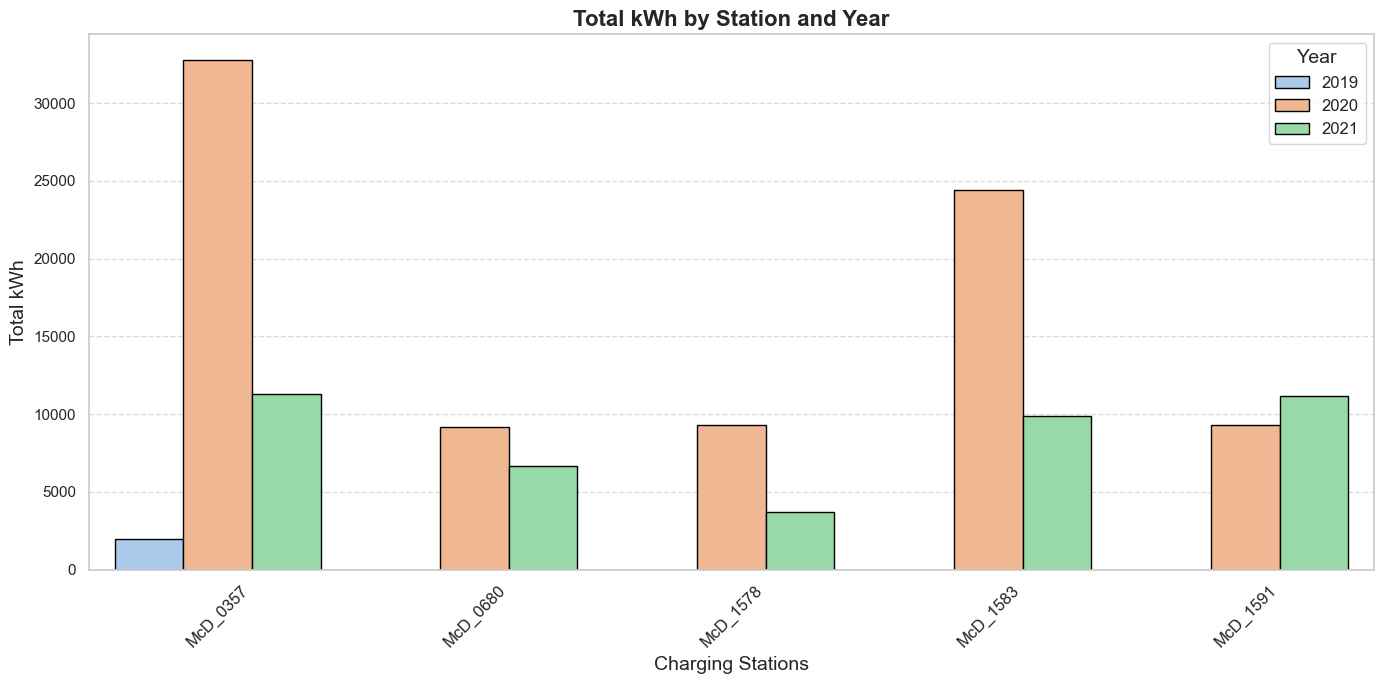

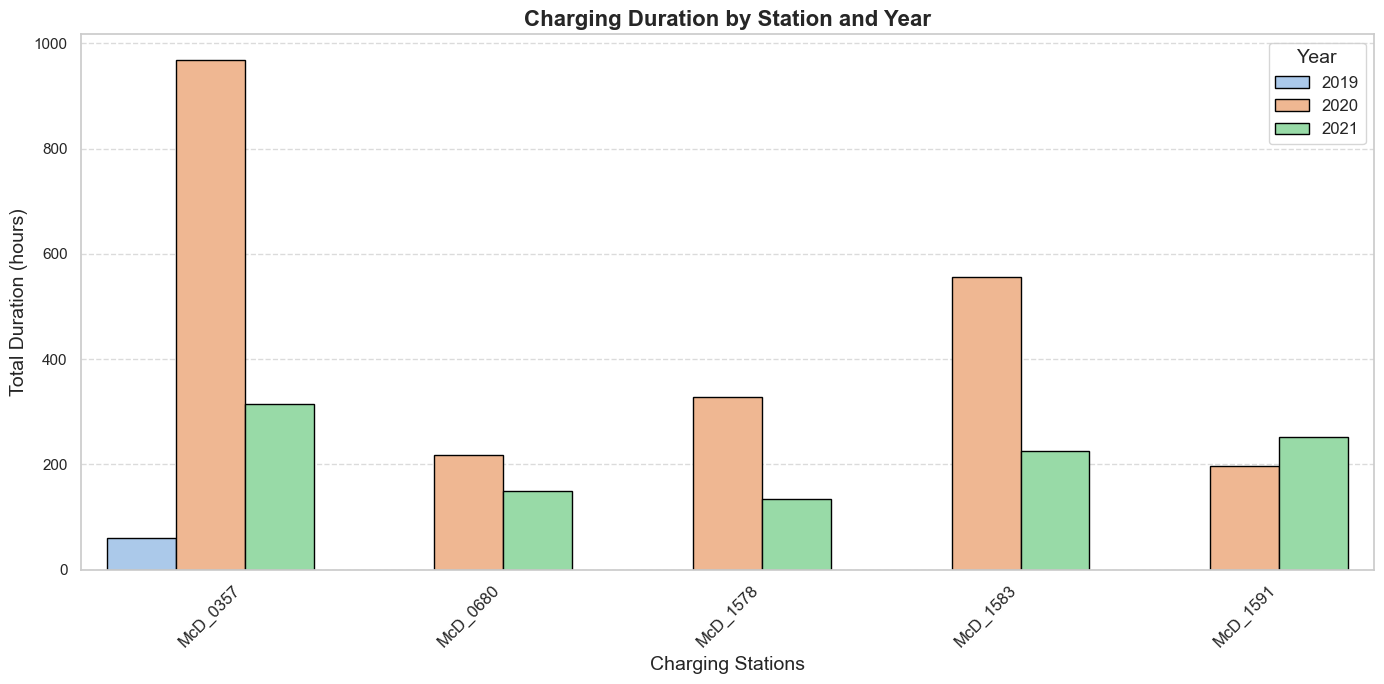

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze ein ansprechendes Seaborn-Theme
sns.set_theme(style="whitegrid")

# 2. Gestapeltes Balkendiagramm für Ladedauer
plt.figure(figsize=(14, 7))
sns.barplot(data=result, x='ChargePointLabel', y='Total kWh', hue='Jahr', palette="pastel", edgecolor="black")

plt.title('Total kWh by Station and Year', fontsize=16, weight='bold')
plt.xlabel('Charging Stations', fontsize=14)
plt.ylabel('Total kWh', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Year", fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('results/kwh_by_year.png', dpi=300)
plt.show()


# 2. Gestapeltes Balkendiagramm für Ladedauer
plt.figure(figsize=(14, 7))
sns.barplot(data=result, x='ChargePointLabel', y='Total Duration (h)', hue='Jahr', palette="pastel", edgecolor="black")

plt.title('Charging Duration by Station and Year', fontsize=16, weight='bold')
plt.xlabel('Charging Stations', fontsize=14)
plt.ylabel('Total Duration (hours)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Year", fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('results/duration_by_year.png', dpi=300)
plt.show()


Optimierungen und Erweiterungen:
- Ladenstation ID ist sehr kurz. Mit Hinblick auf die Zukunft würde man wahrscheinlich schnell and das Limit der 4 Stelligen Zahl stoßen. Besser wäre eventuell eine Hash Nummer mit mehr Stellen.
- Spaltennamen vereinheitlichen über alle Systeme hinweg 
- Prozess Automatisierung: S3 Upload → 2. S3 Event Trigger → 3. Lambda Verarbeitung → 4. Speichern in RDS/Redshift → 5. Überwachung (CloudWatch)
- Einführung von Anomaly Detection und Datenqualität und Validierung